# Seeing is believing: How to plot data with matplotlib and pyplot

This class uses several figures and many blocks of code from the excellent [Python Plotting page](https://realpython.com/python-matplotlib-guide/) on realpython.com by Brad Solomon. 

### **Introduction**

Your ability to understand and communicate data is often entirely dependent on your ability to make a visual representation of that data. The most widely used python library for plotting scientific data is `matplotlib`, in particular the `pyplot` sub-library. In nearly every lecture we will import and use some part of this library. So, let's try to follow the plot twists.

First, we need to import `pyplot`. While we're at it let's import `numpy`, which we covered in the last lecture.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## This command makes it so that the 'random' numbers we use below will be
## same on all computers. Think of it as generating a list of random numbers
## that we all use.
np.random.seed(444)

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png" alt="Objects of a pyplot figure" title = "Pyplot hierarchy"/>

`pyplot` treats each element of a plot as a separate object. A figure is the whole figure, and axes is one subplot within that figure. You can create and manipulate each part of the figure.

matplotlib.figure.Figure

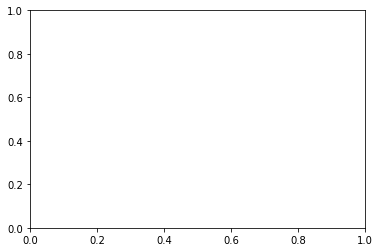

In [2]:
## create a figure named 'fig' and tell us what type of object fig is
fig, _ = plt.subplots()
type(fig)

In [3]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

<img src="https://files.realpython.com/media/anatomy.7d033ebbfbc8.png" alt="Objects of a pyplot figure" title = "Pyplot hierarchy"/>

Here's a more detailed map of `pyplot` objects.

Using `pyplot` can be all kinds of confusing. Often different users like to use different approaches, which makes it hard sometimes to understand examples you find on, for instance, Github. There are two major contributors to this confusion. 

#### `pylab` 
is an alternate method of `pyplot` that is more similar to Matlab. The curators of `matplotlib` actively discourage its use... and yet you will see it used. I won't go into how it differs here, but you can, with effort, google to find out how to translate it to `pyplot` syntax. If you see `pylab` being imported, be wary.

#### Stateful vs Stateless approaches 
refer to the two main ways you can interact with a `pyplot` figure. 

One way is to have the program keep track of which figure, axes, line, etc. that you're currently working with in a list of states, aka the stateful approach. This means that when you want to do something to a figure, you just issue the command and the program implicitly knows what you want from the list of default objects. If you want to change another figure, you have to change the state first.

The other way, which has a lot of advantages, is to never depend on the default values, and instead you explicitly identify each figure, subplot, etc. as a unique named variable. 

In [4]:
def plot(*args, **kwargs):
    """An abridged version of plt.plot()."""
    ax = plt.gca()
    return ax.plot(*args, **kwargs)

def gca(**kwargs):
    """Get the current Axes of the current Figure."""
    return plt.gcf().gca(**kwargs)

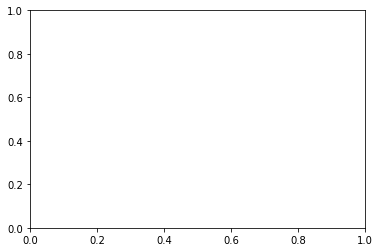

In [5]:
fig, ax = plt.subplots()

In [6]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

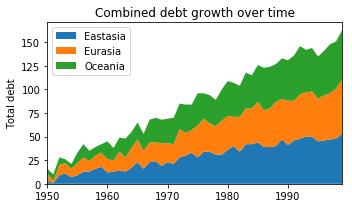

In [7]:
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(left=yrs[0], right=yrs[-1])
fig.tight_layout()

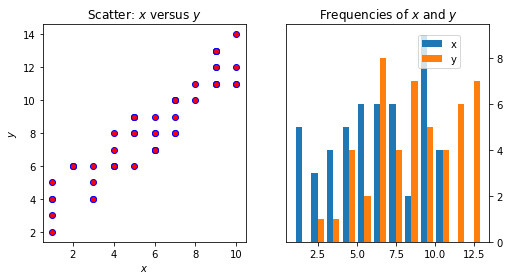

In [8]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [9]:
fig.axes[0] is ax1, fig.axes[1] is ax2

(True, True)

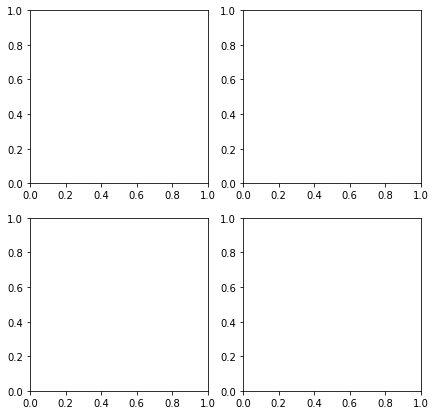

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

In [11]:
print (type(ax))

print (ax)

print (ax.shape)

<class 'numpy.ndarray'>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E5D9D64E0>
(2, 2)


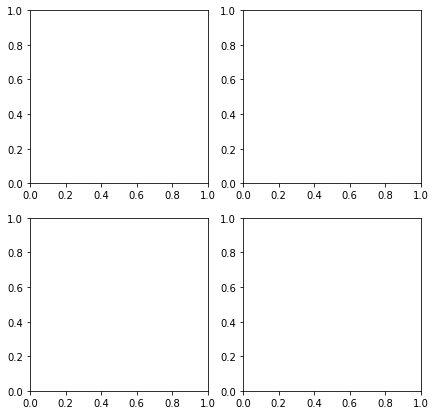

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

In [ ]:
from io import BytesIO
import tarfile
#from urllib.request import urlopen

#url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
#b = BytesIO(urlopen(url).read())b
#fpath = 'CaliforniaHousing/cal_housing.data'

#with tarfile.open(mode='r', fileobj=b) as archive:

#housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

In [14]:
with tarfile.open('Data/cal_housing.tgz', 'r:gz') as archive:
    archive.extractall()

In [18]:
fpath = 'CaliforniaHousing/cal_housing.data'
housing = np.loadtxt(fpath)

ValueError: could not convert string to float: '-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000'

In [16]:
housing.head()

,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


In [17]:
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

TypeError: unhashable type: 'slice'

In [ ]:
def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

In [ ]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

In [ ]:
## example of matshow, maybe, or examples from papers...